<a href="https://colab.research.google.com/github/jpablofdez/DataScience/blob/master/Homework3_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Deep Learning

MNIST dataset

Convolutional Neural Network, version 5

By Juan Carlos Rojas

Copyright 2023, Texas Tech University - Costa Rica

In [2]:
import math
import numpy as np
import pandas as pd
import tensorflow as tf
import time
import matplotlib.pyplot as plt
import random


Part 1

In [3]:
#
# Load and prepare data
#
import keras.datasets.fashion_mnist
(train_data, train_labels), (test_data, test_labels) = keras.datasets.fashion_mnist.load_data()

# Get some lengths
n_samples_train = train_data.shape[0]
n_samples_test = test_data.shape[0]

# Scale pixels to range 0-1.0
maxval = train_data.max()
train_data = train_data / maxval
test_data = test_data / maxval

# One-hot encode the labels
train_labels_onehot = tf.keras.utils.to_categorical(train_labels)
test_labels_onehot = tf.keras.utils.to_categorical(test_labels)
num_classes = test_labels_onehot.shape[1]


4422102/4422102 [==============================] - 0s 0us/step


In [4]:
#
# Neural Network definition
#

# Create a neural network model
model = tf.keras.models.Sequential()

# Reshape input to 2D images with 1 color component
model.add(tf.keras.layers.Reshape( [28, 28, 1], input_shape=[28, 28] ))

# First convolutional layer: 14x14x4
model.add(tf.keras.layers.Conv2D(4, 3, strides=2, padding='same', activation='elu'))

# Second convolutional layer: 7x7x8
model.add(tf.keras.layers.Conv2D(8, 3, strides=2, padding='same', activation='elu'))

# Third convolutional layer: 3x3x16
model.add(tf.keras.layers.Conv2D(16, 3, strides=2, padding='valid', activation='elu'))

# Fourth convolutional layer: 1x1x32
model.add(tf.keras.layers.Conv2D(32, 3, strides=1, padding='valid', activation='elu'))

# Flatten into single dimensional vector
model.add(tf.keras.layers.Flatten())

# Output layer:
model.add(tf.keras.layers.Dense(num_classes, activation='softmax', kernel_initializer='glorot_normal', bias_initializer='zeros'))

model.summary()

# Training constants
batch_size = 64
n_epochs = 200
eval_step = 10
learning_rate = 5e-5

# Print configuration summary
n_batches = math.ceil(n_samples_train / batch_size)
print("Batch size: {} Num batches: {} Num epochs: {}".format(batch_size, n_batches, n_epochs))

# Define the optimizer

# ADAM optimizer
optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)
print("Optimizer: ADAM.  Learning rate = {}".format(learning_rate))

# Define model
model.compile(
        optimizer=optimizer,
        loss='categorical_crossentropy',
        metrics=['accuracy']
        )


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 reshape (Reshape)           (None, 28, 28, 1)         0         
                                                                 
 conv2d (Conv2D)             (None, 14, 14, 4)         40        
                                                                 
 conv2d_1 (Conv2D)           (None, 7, 7, 8)           296       
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 16)          1168      
                                                                 
 conv2d_3 (Conv2D)           (None, 1, 1, 32)          4640      
                                                                 
 flatten (Flatten)           (None, 32)                0         
                                                                 
 dense (Dense)               (None, 10)                3

In [5]:
# Train the neural network
start_time = time.time()
history = model.fit(
        train_data,
        train_labels_onehot,
        epochs=n_epochs,
        batch_size=batch_size,
        validation_data=(test_data, test_labels_onehot),
        validation_freq=eval_step,
        verbose=2,
        )
elapsed_time = time.time() - start_time
print("Execution time: {:.1f}".format(elapsed_time))

# Compute final accuracy
cost_test, acc_test = model.evaluate(test_data, test_labels_onehot, batch_size=None, verbose=0)
cost_train, acc_train = model.evaluate(train_data, train_labels_onehot, batch_size=None, verbose=0)

# Compute the best test result from the history
epoch_hist = [i for i in range(0, n_epochs, eval_step)]
test_acc_hist = history.history['val_accuracy']
test_best_val = max(test_acc_hist)
test_best_idx = test_acc_hist.index(test_best_val)

Epoch 1/200
938/938 - 16s - loss: 1.7699 - accuracy: 0.4577 - 16s/epoch - 17ms/step
Epoch 2/200
938/938 - 3s - loss: 0.8812 - accuracy: 0.6802 - 3s/epoch - 4ms/step
Epoch 3/200
938/938 - 4s - loss: 0.7327 - accuracy: 0.7293 - 4s/epoch - 5ms/step
Epoch 4/200
938/938 - 4s - loss: 0.6630 - accuracy: 0.7526 - 4s/epoch - 4ms/step
Epoch 5/200
938/938 - 3s - loss: 0.6224 - accuracy: 0.7676 - 3s/epoch - 4ms/step
Epoch 6/200
938/938 - 3s - loss: 0.5949 - accuracy: 0.7785 - 3s/epoch - 4ms/step
Epoch 7/200
938/938 - 4s - loss: 0.5737 - accuracy: 0.7869 - 4s/epoch - 4ms/step
Epoch 8/200
938/938 - 3s - loss: 0.5564 - accuracy: 0.7947 - 3s/epoch - 4ms/step
Epoch 9/200
938/938 - 3s - loss: 0.5423 - accuracy: 0.7990 - 3s/epoch - 4ms/step
Epoch 10/200
938/938 - 5s - loss: 0.5303 - accuracy: 0.8039 - val_loss: 0.5461 - val_accuracy: 0.7972 - 5s/epoch - 5ms/step
Epoch 11/200
938/938 - 4s - loss: 0.5199 - accuracy: 0.8085 - 4s/epoch - 4ms/step
Epoch 12/200
938/938 - 3s - loss: 0.5104 - accuracy: 0.8125 - 

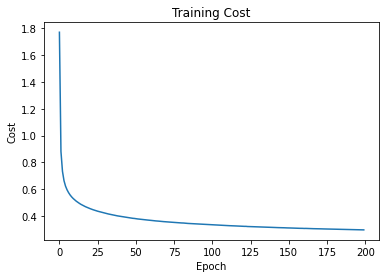

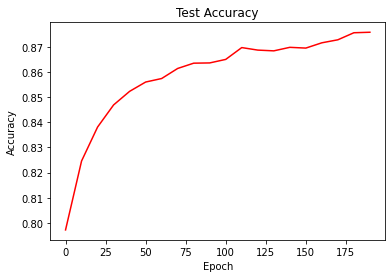

Execution time: 803.6
Final Test Accuracy:     0.8758
Final Training Cost:     0.29394606
Best Test Accuracy:      0.8758 at epoch: 190


In [6]:
# Plot the history of the loss
plt.plot(history.history['loss'])
plt.title('Training Cost')
plt.ylabel('Cost')
plt.xlabel('Epoch')

# Plot the history of the test accuracy
plt.figure()
plt.plot(epoch_hist, history.history['val_accuracy'], "r")
plt.title('Test Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.show()

print("Execution time: {:.1f}".format(elapsed_time))
print("Final Test Accuracy:     {:.4f}".format(acc_test))
print("Final Training Cost:     {:.8f}".format(cost_train))
print("Best Test Accuracy:      {:.4f} at epoch: {}".format(test_best_val, epoch_hist[test_best_idx]))


In [9]:
#model.save("/content/drive/MyDrive/ML2022/Deep Image Processing/mnist_classifier")
model.save("/content/drive/MyDrive/TexasTech/Deep_Image_Processing/fashion_mnist_classifier")

# Nueva sección


Part 2



In [12]:
# An image generator
# Image generator model
#

generator = tf.keras.models.Sequential()
generator.add(tf.keras.layers.Dense( 784, input_shape=[1], activation='sigmoid'))
generator.add(tf.keras.layers.Reshape( [28, 28] ))

generator.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 784)               1568      
                                                                 
 reshape_2 (Reshape)         (None, 28, 28)            0         
                                                                 
Total params: 1,568
Trainable params: 1,568
Non-trainable params: 0
_________________________________________________________________


In [8]:
#
# Load pre-trained model
#
#model = tf.keras.models.load_model("/content/drive/MyDrive/ML2022/Deep Image Processing/mnist_classifier")
classifier = tf.keras.models.load_model("/content/drive/MyDrive/TexasTech/Deep_Image_Processing/fashion_mnist_classifier")

classifier.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 reshape (Reshape)           (None, 28, 28, 1)         0         
                                                                 
 conv2d (Conv2D)             (None, 14, 14, 4)         40        
                                                                 
 conv2d_1 (Conv2D)           (None, 7, 7, 8)           296       
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 16)          1168      
                                                                 
 conv2d_3 (Conv2D)           (None, 1, 1, 32)          4640      
                                                                 
 flatten (Flatten)           (None, 32)                0         
                                                                 
 dense (Dense)               (None, 10)                3

An image generator
Your classifier from part 1), with the feature maps exposed as outputs
The first two layers should be reduced to one number per feature map (style layers)
The other layers should be exposed complete as outputs (content layers)


In [9]:
# Create a new model using the layers of the pre-trained one

# The first two layers will be reduced to one number per feature map
layer1_reduced = tf.reduce_sum(classifier.layers[1].output, axis=(1,2))
layer2_reduced = tf.reduce_sum(classifier.layers[2].output, axis=(1,2))

# The other two layers are exposed in full as outputs

tmp_classifier = tf.keras.Model(
    classifier.layers[0].input,
    [layer1_reduced,
     layer2_reduced,
     classifier.layers[3].output,
     classifier.layers[4].output])

tmp_classifier.trainable = False

tmp_classifier.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 reshape_input (InputLayer)     [(None, 28, 28)]     0           []                               
                                                                                                  
 reshape (Reshape)              (None, 28, 28, 1)    0           ['reshape_input[0][0]']          
                                                                                                  
 conv2d (Conv2D)                (None, 14, 14, 4)    40          ['reshape[0][0]']                
                                                                                                  
 conv2d_1 (Conv2D)              (None, 7, 7, 8)      296         ['conv2d[0][0]']                 
                                                                                              

In [10]:
#
# Stack the generator and classifier
# We will need to use the functional API because it has multiple outputs

stacked_model_input = generator.layers[0].input
stacked_model_out1 = generator(stacked_model_input)
stacked_model_out2 = tmp_classifier(stacked_model_out1)
stacked_model = tf.keras.Model(stacked_model_input, stacked_model_out2)
stacked_model.build(input_shape=[1])

stacked_model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1_input (InputLayer)  [(None, 1)]               0         
                                                                 
 sequential_1 (Sequential)   (None, 28, 28)            1568      
                                                                 
 model (Functional)          [(None, 4),               6144      
                              (None, 8),                         
                              (None, 3, 3, 16),                  
                              (None, 1, 1, 32)]                  
                                                                 
Total params: 7,712
Trainable params: 1,568
Non-trainable params: 6,144
_________________________________________________________________


Part 3

Pick two images to serve as content and style.  Run them by the classifier to obtain the feature maps.
Mix the feature maps of the content and style images by layers.  Lower layers for the style image, upper layers for the content image.



In [1]:
# Select content and style images
#content_img_idx = 2
#style_img_idx = 6
content_img_idx = random.randint(0, 9999)
style_img_idx = random.randint(0, 9999)
print("Content image index: ", content_img_idx)
print("Style image index: ", style_img_idx)

content_img = test_data[content_img_idx].reshape(28,28)
style_img = test_data[style_img_idx].reshape(28,28)
content_img = content_img / 255
style_img = style_img / 255

NameError: ignored

In [16]:

# Compute the target feature map vectors
content_targets = tmp_classifier.predict(content_img.reshape(1,28,28), verbose=0)
#print("Content targets")
#print(content_targets)

style_targets = tmp_classifier.predict(style_img.reshape(1,28,28), verbose=0)
#print("Style targets")
#print(style_targets)

# Combine the targets
combined_targets = content_targets
combined_targets[0] = style_targets[0]
combined_targets[1] = style_targets[1]
#print("Combined targets")
#print(combined_targets)

In [17]:

# Dummy input
dummy_input = np.ones( (1,1) )

# Train the image generator
learning_rate = 100
stacked_model.compile(
        optimizer=tf.keras.optimizers.SGD(learning_rate=learning_rate),
        loss='cosine_similarity'
        )

n_iterations = 1500
eval_step = 100
history = []

In [18]:
for iteration in range(n_iterations):

  # Do one update iteration
  losses = stacked_model.train_on_batch(dummy_input, combined_targets)
  history.append(losses[0])

  if (iteration % eval_step == 0):
      print("Iteration {:2d}: Losses: {}".format(iteration, losses[0]))

      """
      # Generate the image
      gen_image = generator.predict(dummy_input, verbose=0)
      # Compute the classifier output for this image
      model_outputs = tmp_classifier.predict(gen_image, verbose=0)[0]
      # Plot the generated image
      plt.figure()
      plt.imshow(gen_image[0], cmap="gray_r")
      plt.show()
      """

Iteration  0: Losses: 0.7372506260871887
Iteration 100: Losses: -1.1610397100448608
Iteration 200: Losses: -1.3196301460266113
Iteration 300: Losses: -1.4685760736465454
Iteration 400: Losses: -1.5842256546020508
Iteration 500: Losses: -1.7730557918548584
Iteration 600: Losses: -2.0839686393737793
Iteration 700: Losses: -2.6180434226989746
Iteration 800: Losses: -3.6339316368103027
Iteration 900: Losses: -3.9685959815979004
Iteration 1000: Losses: -3.9978952407836914
Iteration 1100: Losses: -3.998227119445801
Iteration 1200: Losses: -3.9982857704162598
Iteration 1300: Losses: -3.998335361480713
Iteration 1400: Losses: -3.998386859893799


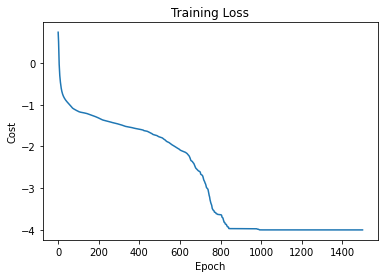

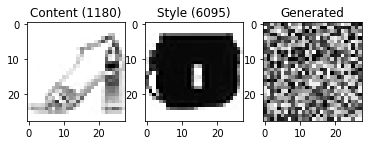

In [19]:
#Display the generated image, alongside the original content and style images.

# Plot the history of the loss
plt.plot(history)
plt.title('Training Loss')
plt.ylabel('Cost')
plt.xlabel('Epoch')
plt.show()

# Generate the final image
gen_image = generator.predict(dummy_input, verbose=0)[0]


# Plot the original and generated images
plt.figure()
plt.subplot(1,3,1)
plt.imshow(content_img, cmap="gray_r")
plt.title("Content ({})".format(content_img_idx))
plt.subplot(1,3,2)
plt.imshow(style_img, cmap="gray_r")
plt.title("Style ({})".format(style_img_idx))
plt.subplot(1,3,3)
plt.imshow(gen_image, cmap="gray_r")
plt.title("Generated")
plt.show()
